In [45]:
import pandas as pd

In [46]:
dataf = pd.read_csv("../full_variants/mpraqtls.cagi.benchmarking.all.tsv", sep="\t", header=0)

In [47]:
dataf.head()

,var.chr_hg19,var.pos_hg19,var.allele1,var.allele2,obs.label,obs.confidence,pred.enformer.variantscore.local_sad,pred.enformer.variantscore.local_sar,pred.chrombpnet.variantscore.logfc,pred.chrombpnet.variantscore.jsd,...,pos_hg19,ref,alt,var.chr_hg38,var.pos_hg38,var.ref_hg38,var.alt_hg38,obs.label_hg38,Confidence_hg38,var.rsid
0,chr6,37775290,G,A,0.03,0.01,-0.021439,-0.025864,-0.184138,-0.041913,...,37775290,G,A,chr6,37807514,G,A,0.03,0.01,"6,37775290,G,A,0.03,0.01,challenge_ZFAND3.tsv"
1,chr6,37775290,G,C,0.03,0.01,-0.013206,-0.015869,-0.115516,-0.033420,...,37775290,G,C,chr6,37807514,G,C,0.03,0.01,"6,37775290,G,C,0.03,0.01,challenge_ZFAND3.tsv"
2,chr6,37775290,G,T,0.07,0.01,-0.022903,-0.027649,-0.138834,-0.049750,...,37775290,G,T,chr6,37807514,G,T,0.07,0.01,"6,37775290,G,T,0.07,0.01,challenge_ZFAND3.tsv"
3,chr6,37775291,T,A,-0.07,0.01,0.005508,0.006592,-0.000805,-0.032182,...,37775291,T,A,chr6,37807515,T,A,-0.07,0.01,"6,37775291,T,A,-0.07,0.01,challenge_ZFAND3.tsv"
4,chr6,37775291,T,C,0.03,0.01,0.028412,0.033691,0.107414,0.042707,...,37775291,T,C,chr6,37807515,T,C,0.03,0.01,"6,37775291,T,C,0.03,0.01,challenge_ZFAND3.tsv"


In [48]:
dataf.columns

Index(['var.chr_hg19', 'var.pos_hg19', 'var.allele1', 'var.allele2',
       'obs.label', 'obs.confidence', 'pred.enformer.variantscore.local_sad',
       'pred.enformer.variantscore.local_sar',
       'pred.chrombpnet.variantscore.logfc',
       'pred.chrombpnet.variantscore.jsd', 'abs_logfc_x_max_percentile.mean',
       'abs_logfc_x_max_percentile.mean.pval', 'obs.challenge',
       'obs.expt_encid', 'chr_hg19', 'pos_hg19', 'ref', 'alt', 'var.chr_hg38',
       'var.pos_hg38', 'var.ref_hg38', 'var.alt_hg38', 'obs.label_hg38',
       'Confidence_hg38', 'var.rsid'],
      dtype='object')

In [49]:
import numpy as np
dataf = dataf[~np.isnan(dataf["pred.enformer.variantscore.local_sar"])]

In [50]:
challenges = list(set(dataf["obs.challenge"]))

In [51]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}

for challenge in challenges:
    temp = dataf[dataf["obs.challenge"] == challenge]
    models = list(set(temp["obs.expt_encid"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["obs.expt_encid"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.chrombpnet.variantscore.logfc"])
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.chrombpnet.variantscore.jsd"])
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challenge.replace("challenge_","").replace(".tsv","") + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])
        
        pear_dict_enf[challenge].append(pear1)



In [52]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    print(key)
    print(pear_dict_logfc[key])
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 


challenge_SORT1.tsv
[(0.7622489179170531, 1.9863545875296955e-258)]
challenge_HBG1.tsv
[(0.5497457141072194, 4.881959624048756e-51)]
challenge_GP1BB.tsv
[(0.5233155319517283, 4.72596755383789e-62)]
challenge_HBB.tsv
[(0.5601838291960668, 4.68326821310351e-37)]
challenge_LDLR.tsv
[(0.5750109866204485, 2.4414774220882673e-64)]
challenge_MYCrs6983267.tsv
[(0.508477059697288, 1.424872255969389e-90)]
challenge_IRF4.tsv
[(0.8165519350021742, 1.0846712141231741e-233)]
challenge_PKLR.tsv
[(0.8066711580652025, 3.237779644680488e-235)]
challenge_F9.tsv
[(0.333298891870067, 8.552557718428353e-19)]
challenge_ZFAND3.tsv
[(0.4518997677422695, 8.785701511273722e-64), (0.4379809428444311, 1.3573919387639042e-59), (0.3163151943097338, 2.2408854077026455e-30), (0.2902708589376769, 1.2353176315611324e-25), (0.3062300831221093, 1.7530555359847562e-28)]
challenge_IRF6.tsv
[(0.6910706773025032, 7.561732589340371e-193), (0.6767983098228597, 4.557662998894753e-182)]
challenge_HNF4A.tsv
[(0.383039666959116, 8.

challenge_SORT1.tsv (0.667001419910908, 0.5220823990168146)
challenge_HBG1.tsv (0.451157940906812, 0.14587095143969553)
challenge_GP1BB.tsv (0.44802415815446056, 0.47205022981619266)
challenge_HBB.tsv (0.4570364784652091, 0.4249386569940439)
challenge_LDLR.tsv (0.6359397040898551, 0.579072736314436)
challenge_MYCrs6983267.tsv (0.5358743013127105, 0.573783992279473)
challenge_IRF4.tsv (0.7210106177627561, 0.6261232756990919)
challenge_PKLR.tsv (0.7944434633755655, 0.7968832540705849)
challenge_F9.tsv (0.3018636111219602, 0.08819851923478136)
challenge_ZFAND3.tsv (0.41596998791104534, 0.4171465992089521)
challenge_IRF6.tsv (0.5061270462267127, 0.6549134344255393)
challenge_HNF4A.tsv (0.35131091057004044, 0.29097554418302185)
challenge_MSMB.tsv (0.195514867865758, 0.09576838651866845)
challenge_TERT-HEK293T.tsv (0.3700997285561069, 0.46237325058903983)


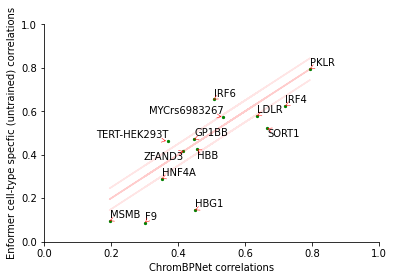

In [64]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_jsd,best_pear_sad, s=5, c="g")
ax.plot(best_pear_jsd,best_pear_jsd, c="r",  alpha=0.2)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_jsd,np.array(best_pear_jsd)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_jsd[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_jsd[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_jsd.pdf", transparent=True, dpi=300)

challenge_SORT1.tsv (0.7622489179170531, 0.6187820217627544)
challenge_HBG1.tsv (0.5497457141072194, 0.18851068518283778)
challenge_GP1BB.tsv (0.5233155319517283, 0.5639564947233268)
challenge_HBB.tsv (0.5601838291960668, 0.5784344527267236)
challenge_LDLR.tsv (0.5750109866204485, 0.6279168449537609)
challenge_MYCrs6983267.tsv (0.508477059697288, 0.5589049959383294)
challenge_IRF4.tsv (0.8165519350021742, 0.7141790825255856)
challenge_PKLR.tsv (0.8066711580652025, 0.8091312664217033)
challenge_F9.tsv (0.333298891870067, 0.2910237971063166)
challenge_ZFAND3.tsv (0.4518997677422695, 0.44980549021497984)
challenge_IRF6.tsv (0.6910706773025032, 0.647739059957578)
challenge_HNF4A.tsv (0.383039666959116, 0.288200934853065)
challenge_MSMB.tsv (0.22558972839140307, 0.1191656497017333)
challenge_TERT-HEK293T.tsv (0.5513406355044358, 0.5871151716773245)


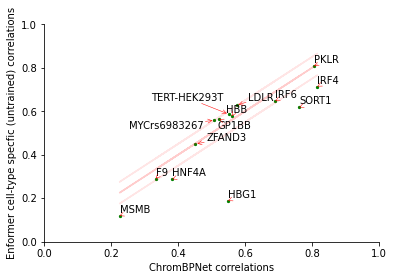

In [53]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_logfc.pdf", transparent=True, dpi=300)

In [54]:
scipy.stats.mannwhitneyu(best_pear_logfc, best_pear_sad)

MannwhitneyuResult(statistic=100.0, pvalue=0.9450520886884962)

In [55]:
np.mean(best_pear_logfc)

0.552746035737641

In [56]:
np.mean(best_pear_sad)

0.50306185341043

In [57]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}

for challenge in challenges:
    temp = dataf[dataf["obs.challenge"] == challenge]
    models = list(set(temp["obs.expt_encid"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["obs.expt_encid"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)

        pear = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.chrombpnet.variantscore.logfc"]))
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(abs(temp_new["obs.label"]),abs(temp_new["pred.chrombpnet.variantscore.jsd"]))
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challenge.replace("challenge_","").replace(".tsv","") + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(abs(dnf["data.Value"]),abs(dnf["dnase"]))
        
        pear_dict_enf[challenge].append(pear1)



In [58]:
best_pear_logfc = []
best_pear_jsd = []
best_pear_sad = []
keys = list(pear_dict_jsd.keys())
for key in keys:
    best_pear_logfc.append(np.max(pear_dict_logfc[key]))
    best_pear_jsd.append(np.max(pear_dict_jsd[key]))    
    best_pear_sad.append(np.max(pear_dict_enf[key])) 


challenge_SORT1.tsv (0.7298244033765757, 0.5220823990168146)
challenge_HBG1.tsv (0.49073434794765775, 0.14587095143969553)
challenge_GP1BB.tsv (0.496852311893179, 0.47205022981619266)
challenge_HBB.tsv (0.4323856774753302, 0.4249386569940439)
challenge_LDLR.tsv (0.6170439852224705, 0.579072736314436)
challenge_MYCrs6983267.tsv (0.5342433830944656, 0.573783992279473)
challenge_IRF4.tsv (0.8153821220408364, 0.6261232756990919)
challenge_PKLR.tsv (0.8136353467506185, 0.7968832540705849)
challenge_F9.tsv (0.08932140510421538, 0.08819851923478136)
challenge_ZFAND3.tsv (0.44413637753789975, 0.4171465992089521)
challenge_IRF6.tsv (0.6852327719189641, 0.6549134344255393)
challenge_HNF4A.tsv (0.3430776876672354, 0.29097554418302185)
challenge_MSMB.tsv (0.199814049101721, 0.09576838651866845)
challenge_TERT-HEK293T.tsv (0.4289490061960694, 0.46237325058903983)


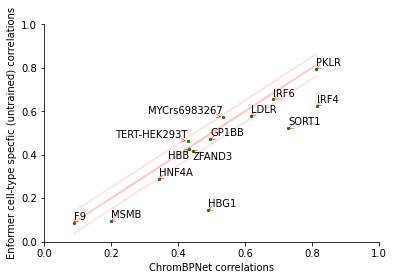

In [59]:
from adjustText import adjust_text
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig, ax = plt.subplots()

ax.scatter(best_pear_logfc,best_pear_sad, s=5, c="g")
ax.plot(best_pear_logfc,best_pear_logfc, c="r",  alpha=0.2)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)-0.05, c="r",  alpha=0.1)
ax.plot(best_pear_logfc,np.array(best_pear_logfc)+0.05, c="r",  alpha=0.1)

ax.set_xlabel("ChromBPNet correlations")
ax.set_ylabel("Enformer cell-type specfic (untrained) correlations")
ax.set_ylim((0,1.0))
ax.set_xlim((0,1.0))

texts = []
for i, txt in enumerate(keys):
    print(keys[i], (best_pear_logfc[i], best_pear_sad[i]))
    texts.append(plt.text(best_pear_logfc[i], best_pear_sad[i], keys[i].replace("challenge_","").replace(".tsv","")))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
ax.spines[["top", "right"]].set_visible(False)

plt.savefig("subfigs/cagi_logfc_abs.pdf", transparent=True, dpi=300)

logfc (0.5497457141072194, 4.881959624048756e-51)
enformer (0.18851068518283778, 1.8888239190707555e-06)
logfc (0.22558972839140307, 6.201737879908114e-17)
enformer (0.1191656497017333, 0.0003614069297465672)
logfc (0.8165519350021742, 1.0846712141231741e-233)
enformer (0.7141790825255856, 1.8925793862734474e-152)
logfc (0.7622489179170531, 1.9863545875296955e-258)
enformer (0.6187820217627544, 1.1822834552124175e-136)
logfc (0.383039666959116, 8.354398889143574e-25)
enformer (0.288200934853065, 3.040899167026027e-14)


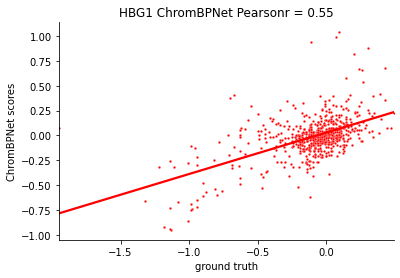

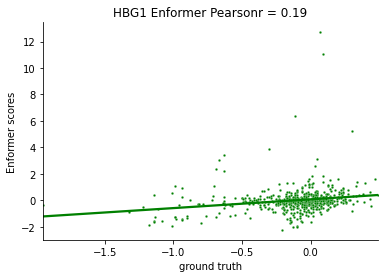

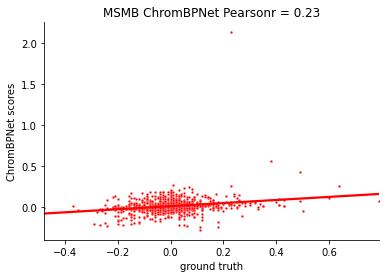

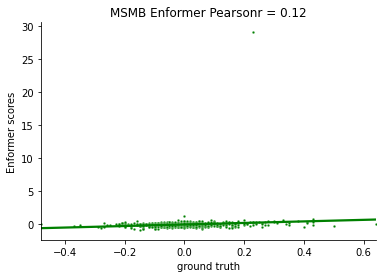

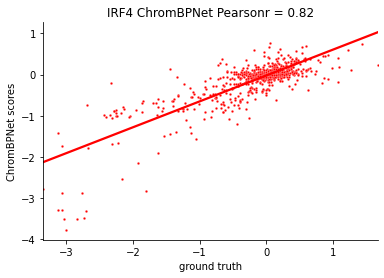

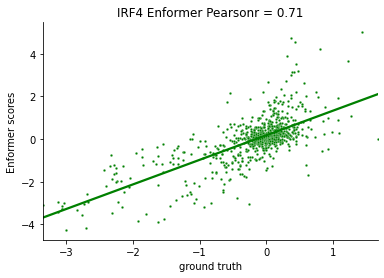

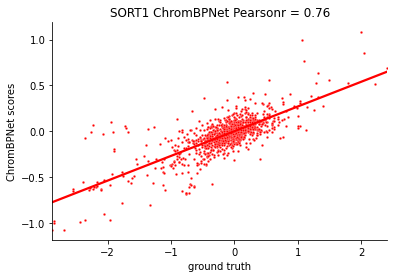

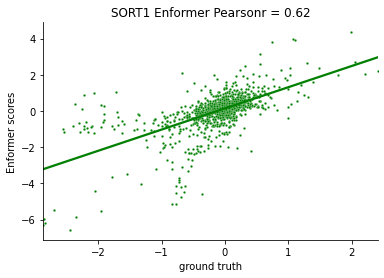

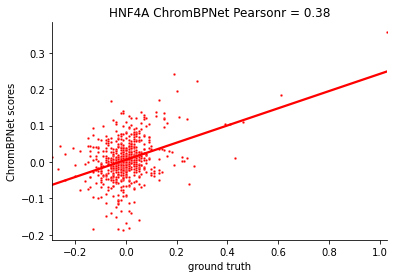

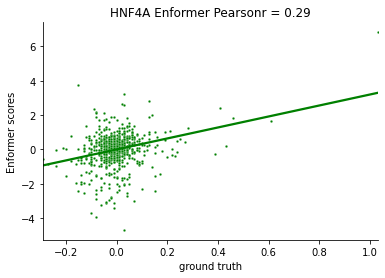

In [61]:
import scipy.stats

enf_preds_dir = "/mnt/lab_data2/anusri/chrombpnet/results/variant_data/CAGI/enformer_preds/alldata/"

pear_dict_logfc = {}
pear_dict_jsd = {}
pear_dict_enf = {}
import seaborn as sns

for challenge in ["challenge_HBG1.tsv", "challenge_MSMB.tsv", "challenge_IRF4.tsv", "challenge_SORT1.tsv", "challenge_HNF4A.tsv"]:
    temp = dataf[dataf["obs.challenge"] == challenge]
    models = list(set(temp["obs.expt_encid"]))
    pear_dict_logfc[challenge] = []
    pear_dict_jsd[challenge] = []
    pear_dict_enf[challenge] = []
    for model in models:
        temp_new = temp[temp["obs.expt_encid"]==model].drop_duplicates()
        #print(temp_new.shape)
        #temp_new = temp_new[temp_new["Confidence"]<0.1]
        #print(temp_new.shape)
        
        challengen = challenge.replace("challenge_","").replace(".tsv","")
                    
        fig, ax =  plt.subplots()
        ax = sns.scatterplot(x="obs.label", y="pred.chrombpnet.variantscore.logfc", data=temp_new, s=6, color="red")
        sns.regplot(x="obs.label", y="pred.chrombpnet.variantscore.logfc", data=temp_new, scatter=False, ci=None, color="red")
        ax.set_xlabel("ground truth")
        ax.set_ylabel("ChromBPNet scores")
        ax.set_title(challengen+" ChromBPNet Pearsonr = "+str(np.round(scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.chrombpnet.variantscore.logfc"])[0],2)))
        ax.spines[["top", "right"]].set_visible(False)
        plt.savefig("subfigs/cagi_chrombpnet_"+challengen+".pdf", transparent=True, dpi=300)
        print("logfc",scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.chrombpnet.variantscore.logfc"]))
                    
        pear_dict_logfc[challenge].append(pear)

        pear = scipy.stats.pearsonr(temp_new["obs.label"],temp_new["pred.chrombpnet.variantscore.jsd"])
        pear_dict_jsd[challenge].append(pear)

        ifile = enf_preds_dir + challengen + ".ZigaDataLocal.csv"
        dnf=pd.read_csv(ifile, sep=",", header=0)
        pear1 = scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])
        
        pear_dict_enf[challenge].append(pear1)

        fig, ax =  plt.subplots()
        ax = sns.scatterplot(x="data.Value", y="dnase", data=dnf, s=6, color="green")
        sns.regplot(x="data.Value", y="dnase", data=dnf, scatter=False, ci=None, color="green")
        ax.set_xlabel("ground truth")
        ax.set_ylabel("Enformer scores")
        ax.set_title(challengen+" Enformer Pearsonr = "+str(np.round(scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"])[0],2)))
        print("enformer",scipy.stats.pearsonr(dnf["data.Value"],dnf["dnase"]))
        ax.spines[["top", "right"]].set_visible(False)
        plt.savefig("subfigs/cagi_enformer_"+challengen+".pdf", transparent=True, dpi=300)

